# Modelo de regressão linear

>[Modelo de regressão linear](#scrollTo=QoBv84MIUa-h)

>>[1. Vamos começar por importar os packages e o dataset](#scrollTo=HO6jdFDmldaU)

>>[2. Vamos explorar o dataset](#scrollTo=2S0UrVDEf8E-)

>>[3. Vamos visualizar a informação](#scrollTo=lYnaR0LYO-Sg)

>>[4. Vamos aplicar o modelo de regressão](#scrollTo=BKzodGb8R7t9)

>>>[4.1. Primeira abordagem (1 variável characterística)](#scrollTo=6AUIuQaWSCdM)

>>>[4.2. Vamos considerar as várias características disponíveis](#scrollTo=VlyljBsUgD8D)

>>[5. Vamos agora aplicar a regressão com regularização](#scrollTo=Z-_Mfy5StNhM)

>>>[5.1. Ridge](#scrollTo=FxZ0QYaAfu1S)

>>>[5.2. Lasso](#scrollTo=bsFM5l28hFLs)

>>[6. Vamos visualizar os resíduos](#scrollTo=bJoXSNz21wUm)



## 1.&nbsp;Vamos começar por importar os packages e o dataset

In [1]:
# packages gerais
import pandas as pd
import numpy as np

# dataset
df_car_price = pd.read_csv("C:/Users/yfreitas/Documents/pythonSamples/Machine Learning/Files/CarPrice_Assignment.csv")

## 2.&nbsp;Vamos explorar o dataset

In [2]:
df_car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.5 KB


In [3]:
# exploração inicial
df_car_price.head()
# df_car_price.info()
# df_car_price.shape
# df_car_price.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## 3.&nbsp;Vamos visualizar a informação


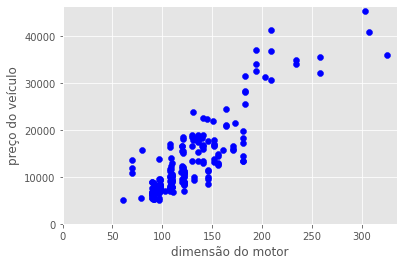

In [4]:
# importamos o matplotlib.pyplot
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#definimos as variáveis que queremos visualizar (enginesize e price)
x_variable = df_car_price["enginesize"]
y_variable = df_car_price["price"]
plt.scatter(x_variable, y_variable, color = 'b')
plt.xlim(0, x_variable.max()+10)
plt.ylim(0, y_variable.max()+1000)
plt.ylabel("preço do veículo")
plt.xlabel('dimensão do motor')
plt.show()

## 4.&nbsp;Vamos aplicar o modelo de regressão

In [5]:
# definimos a variável alvo
target_variable = "price"

# train_test split usando a função train_test_split
# -> não consideramos stratification

X = df_car_price.drop([target_variable], axis = 1)
y = df_car_price[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 12)

### 4.1.&nbsp;Primeira abordagem (1 variável characterística)

In [6]:
# vamos escolher enginesize como variável independente
X_1_feature = X_train[['enginesize']]

# vamos importar o modelo
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_1_feature, y_train)

# vamos prever para todos os valores
y_reg = lin_reg.predict(X[['enginesize']].sort_values('enginesize'))

# podemos ver os coeficientes da regressão
m = lin_reg.coef_[0]
b = lin_reg.intercept_
print("m: {}; b: {}".format(m , b))

# para verificar a accuracy do modelo aplicamos a função .score (#R2)
print("r2: {}".format(lin_reg.score(X_test[['enginesize']], y_test).round(3)))

m: 164.57563656388763; b: -7632.842331568525
r2: 0.687


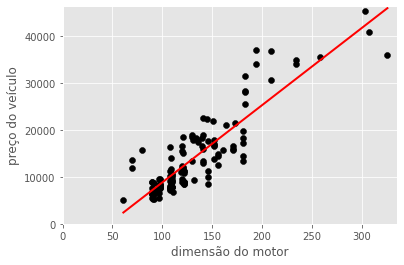

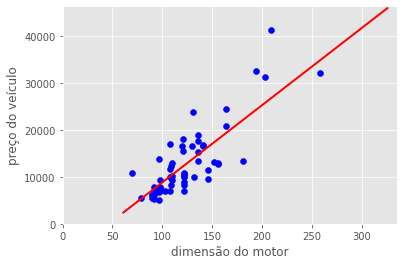

In [7]:
# vamos visualizar o resultado
plt.scatter(X_train[['enginesize']], y_train, color = 'k')
plt.plot(X[['enginesize']].sort_values('enginesize'), y_reg, color = 'r', linewidth = 2)
plt.xlim(0, x_variable.max()+10)
plt.ylim(0, y_variable.max()+1000)
plt.ylabel("preço do veículo")
plt.xlabel('dimensão do motor')
plt.show()

# vamos visualizar o resultado
plt.scatter(X_test[['enginesize']], y_test, color = 'b')
plt.plot(X[['enginesize']].sort_values('enginesize'), y_reg, color = 'r', linewidth = 2)
plt.xlim(0, x_variable.max()+10)
plt.ylim(0, y_variable.max()+1000)
plt.ylabel("preço do veículo")
plt.xlabel('dimensão do motor')
plt.show()

### 4.2.&nbsp;Vamos considerar as várias características disponíveis

In [8]:
# importamos o modelo
from sklearn.linear_model import LinearRegression
lin_reg_all = LinearRegression()
lin_reg_all.fit(X_train, y_train)
y_pred = lin_reg_all.predict(X_test)

# podemos ver os coeficientes da regressão
betas = lin_reg_all.coef_
beta0 = lin_reg_all.intercept_
print("betas: {}; beta0: {}".format(betas , beta0))

# para verificar a accuracy do modelo aplicamos a função .score (#R2)
print("r2: {}".format(lin_reg_all.score(X_test, y_test).round(3)))

betas: [ 2.25693757e+02 -2.28542902e+02  8.34263775e+02  1.59202838e+02
  2.15690319e+00  1.15675567e+02  8.68487297e+02 -2.84020889e+03
  3.02351981e+02  2.76608163e+01  2.38738008e+00 -4.14692367e+02
  3.11341744e+02]; beta0: -64010.303060802
r2: 0.765


## 5.&nbsp;Vamos agora aplicar a regressão com regularização

### 5.1.&nbsp;Ridge

In [9]:
# importamos o modelo
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.3)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# podemos ver os coeficientes da regressão
betas = ridge_reg.coef_
beta0 = ridge_reg.intercept_
print("betas: {}; beta0: {}".format(betas , beta0))

# para verificar a accuracy do modelo aplicamos a função .score (#R2)
print("r2: {}".format(ridge_reg.score(X_test, y_test).round(3)))

betas: [ 2.24217299e+02 -2.27373276e+02  8.33157505e+02  1.60321517e+02
  2.14636828e+00  1.15514102e+02  8.33536372e+02 -2.76762061e+03
  3.01069372e+02  2.78851920e+01  2.37496314e+00 -4.12464722e+02
  3.08921661e+02]; beta0: -64055.71004782999
r2: 0.766


### 5.2.&nbsp;Lasso

In [10]:
# importamos o modelo
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 2)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# podemos ver os coeficientes da regressão
betas = lasso_reg.coef_
beta0 = lasso_reg.intercept_
print("betas: {}; beta0: {}".format(betas , beta0))

# para verificar a accuracy do modelo aplicamos a função .score (#R2)
print("r2: {}".format(lasso_reg.score(X_test, y_test).round(3)))

betas: [ 2.24894953e+02 -2.27360123e+02  8.31852351e+02  1.58737117e+02
  2.15650201e+00  1.15573503e+02  8.19011469e+02 -2.81677964e+03
  3.01569620e+02  2.78189977e+01  2.37743717e+00 -4.12087145e+02
  3.08687503e+02]; beta0: -63792.34504185871
r2: 0.766


In [11]:
y_pred_lasso

array([ 6688.48832744, 17898.71229514, 12812.14539052, 15301.46488127,
       12646.13032545,  8527.08145078,  9821.52883953,  6522.12838853,
        6928.13848786, 18135.92751634,  9468.7700913 ,  5648.39879371,
       10161.16820074, 18991.94688373, 18867.18905008,  5547.959699  ,
       26816.91693136, 13362.85553489, 14984.37586241,  9816.76344508,
       16473.01655197,  6956.77312073,  5570.80684013, 13746.71289284,
        9362.60011468,  6067.2390485 , 10220.26624409, 25800.13206083,
        9712.78599608,  9151.75055591,  6965.87848989,  9076.45652496,
       10020.53920037, 10793.02094485,  7356.3377158 ,  9532.08346179,
        8068.74400944, 15181.88829622, 10760.53362774, 16827.80699158,
        6095.27357464, 15021.60806284, 11610.54192711, 21822.819197  ,
        8811.79464041, 12005.34265048, 14668.78379446,  6636.69787106,
       12537.47246983, 10354.8022764 ,  5444.33075627, 15933.14607062,
        9446.32102538, 38071.8213861 , 30646.72846521, 15990.54144375,
      

## 6.&nbsp;Vamos visualizar os resíduos

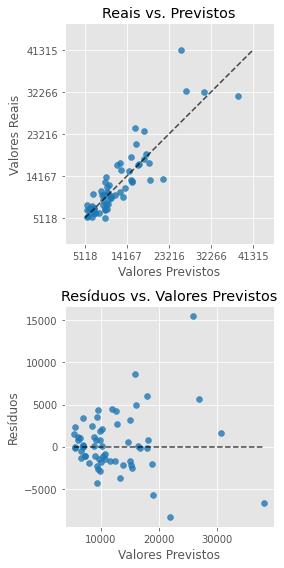

In [12]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=2, figsize=(4, 8))
PredictionErrorDisplay.from_predictions(
    y_true = y_test,
    y_pred = y_pred_lasso,
    kind="actual_vs_predicted",
    ax=axs[0],
)
axs[0].set_title("Reais vs. Previstos")
axs[0].set_xlabel("Valores Previstos")
axs[0].set_ylabel("Valores Reais")

PredictionErrorDisplay.from_predictions(
    y_true = y_test,
    y_pred=y_pred_lasso,
    kind="residual_vs_predicted",
    ax=axs[1],
)

axs[1].set_title("Resíduos vs. Valores Previstos")
axs[1].set_xlabel("Valores Previstos")
axs[1].set_ylabel("Resíduos")

plt.tight_layout()
plt.show()

# 7.&nbsp;Vamos aplicar o modelo de random forest regressor

In [13]:
# importamos o modelo
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400, max_features = 'sqrt', oob_score = True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# para verificar a accuracy do modelo aplicamos a função .score
rf.oob_score_
rf.score(X_test, y_test) #R2

0.9154729191019737

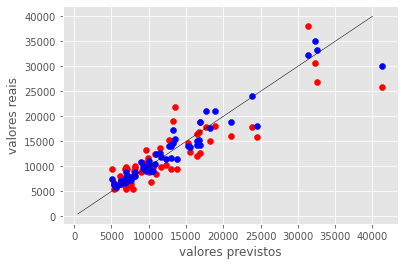

In [14]:
# vamos visualizar o resultado
plt.scatter(y_test, y_pred, color = 'r')
plt.scatter(y_test, y_pred_rf, color = 'b')
plt.plot([500, 40000],[500, 40000], color = 'k', linewidth = 0.5)
plt.ylabel("valores reais")
plt.xlabel('valores previstos')
plt.show()

### 7.1.&nbsp; vamos aplicar o GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV, KFold

# Vamos definir o cv
kf = KFold(n_splits=5)

# Vamos definir a grid para os hyperparameters
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Vamos definir as métricas de scoring
scoring = {
    'mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

# Vamos aplicar a grid search ao modelo de Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=kf, scoring=scoring, refit='r2')
grid_search_rf.fit(X_train, y_train)

# Vamos ver os melhores hyperparameters
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print("Best Parameters for Random Forest Regressor:", best_params_rf)
print("Best Cross-Validation R2 Score for Random Forest Regressor:", best_score_rf)

Best Parameters for Random Forest Regressor: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R2 Score for Random Forest Regressor: 0.9208900777841624


### 7.2. Aplicar a predicao com o melhor resultado do gridsearch

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Vamos ver os resultados para cada combinação
pd.DataFrame(grid_search_rf.cv_results_)

# Vamos fazer o fit do melhor modelo de Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Vamos avaliar as métricas finais
print("\nRandom Forest Regressor Evaluation")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor Evaluation
Mean Squared Error: 5000624.059563467
R2 Score: 0.9076821477359779
